In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [24]:
os.listdir("//dm11/turnerlab/Rishika/4Y-Maze/RunData/")

['AberrantFlyOctanolLearningTest-03_24_2022-14_39',
 'ACVPreferenceTest-03_26_2022-10_41',
 'ACVPreferenceTest-03_26_2022-13_00',
 'FailedOctLearningTest-03_29_2022-18_22',
 'MchLearningTest-03_23_2022-15_50',
 'MchLearningTest-03_24_2022-10_35',
 'MchUnlearningOctLearningTest-03_24_2022-11_32',
 'OctLearningAfterMCHUnlearningTest-03_24_2022-11_58',
 'OctLearningTest-03_23_2022-12_05',
 'OctLearningTest-03_23_2022-14_12',
 'Y4-Arena1-Test-03_23_2022-11_47',
 'Y4-Arena1-Test-03_23_2022-11_54']

### Octanol Learning

In [144]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-12_05/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningTest-03_23_2022-14_12/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']

In [145]:
histories1 = df1['FlyChoiceMatrix'][0][0].T
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0]], [df1['RewardStateTallyOdor2'][0][0]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories = np.concatenate([histories1, histories2], axis=0)
schedules = np.concatenate([schedules1, schedules2], axis=0)

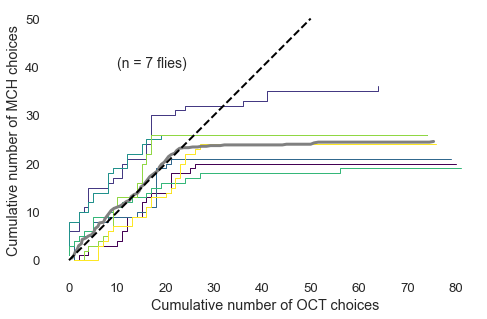

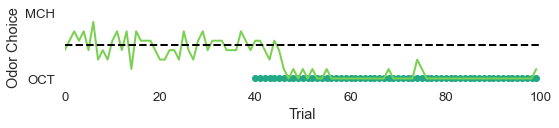

In [146]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(7):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/6),alpha=1,linewidth=1)
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray',label=f"Average")
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(10,40,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('OctLearningTest.png',dpi=300,transparent=True)
plt.show()


i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["OCT","MCH"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('OctLearningTest-schedules.png',dpi=300,transparent=True)
plt.show()


### Methycyclohexanol Learning

In [107]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_23_2022-15_50/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_24_2022-10_35/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']

In [109]:
histories1 = df1['FlyChoiceMatrix'][0][0].T[[0,2]]
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0][:,[0,2]]], [df1['RewardStateTallyOdor2'][0][0][:,[0,2]]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories = np.concatenate([histories1, histories2], axis=0)
schedules = np.concatenate([schedules1, schedules2], axis=0)

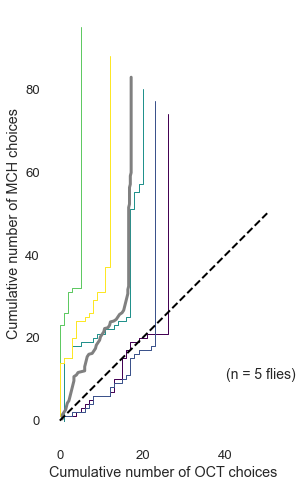

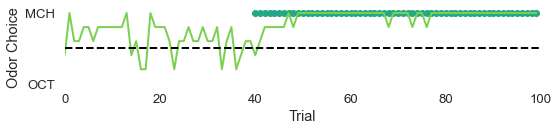

In [113]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(5):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/4),alpha=1,linewidth=1)
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray',label=f"Average")
plt.plot([0,100//2],[0,100//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('MchLearningTest.png',dpi=300,transparent=True)
plt.show()

i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["OCT","MCH"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('MchLearningTest-schedules.png',dpi=300,transparent=True)
plt.show()

### ACV Preference Experiments

In [114]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/ACVPreferenceTest-03_26_2022-10_41/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/ACVPreferenceTest-03_26_2022-13_00/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']

In [115]:
histories1 = df1['FlyChoiceMatrix'][0][0].T#[[0,2]]
histories2 = df2['FlyChoiceMatrix'][0][0].T#[[0,2,3]]
histories = np.concatenate([histories1, histories2], axis=0)

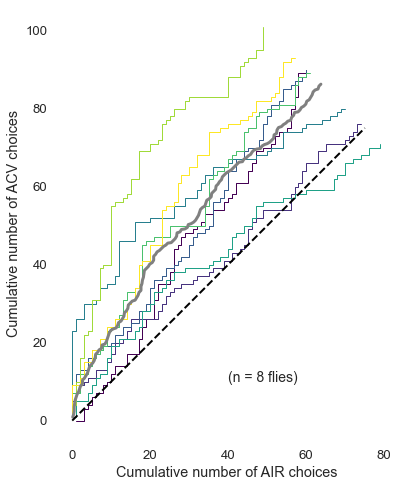

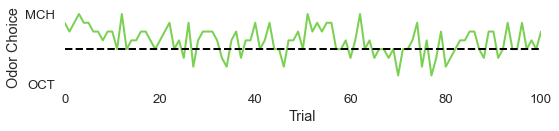

In [119]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(8):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/7),alpha=1,linewidth=1)
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray',label=f"Average")
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of AIR choices')
plt.ylabel('Cumulative number of ACV choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('ACVPreferenceTest.png',dpi=300,transparent=True)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["OCT","MCH"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('ACVPreferenceTest-schedules.png',dpi=300,transparent=True)
plt.show()

### Reversal Experiment

In [120]:
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchLearningTest-03_24_2022-10_35/YArenaInfo.mat"
df1 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/MchUnlearningOctLearningTest-03_24_2022-11_32/YArenaInfo.mat"
df2 = loadmat(loadmat_file)['YArenaInfo']
loadmat_file = "//dm11/turnerlab/Rishika/4Y-Maze/RunData/OctLearningAfterMCHUnlearningTest-03_24_2022-11_58/YArenaInfo.mat"
df3 = loadmat(loadmat_file)['YArenaInfo']

In [136]:
histories1 = df1['FlyChoiceMatrix'][0][0].T[[0,2,3]]
schedules1 = np.concatenate([[df1['RewardStateTallyOdor1'][0][0][:,[0,2,3]]], [df1['RewardStateTallyOdor2'][0][0][:,[0,2,3]]]], axis=0).transpose((2, 1, 0))
histories2 = df2['FlyChoiceMatrix'][0][0].T[[0,2,1]]
schedules2 = np.concatenate([[df2['RewardStateTallyOdor1'][0][0][:,[0,2,1]]], [df2['RewardStateTallyOdor2'][0][0][:,[0,2,1]]]], axis=0).transpose((2, 1, 0))
histories3 = df3['FlyChoiceMatrix'][0][0].T[[0,2,1]]
schedules3 = np.concatenate([[df3['RewardStateTallyOdor1'][0][0][:,[0,2,1]]], [df3['RewardStateTallyOdor2'][0][0][:,[0,2,1]]]], axis=0).transpose((2, 1, 0))

In [140]:
histories = np.concatenate([histories1, histories2, histories3], axis=1)
schedules = np.concatenate([schedules1, schedules2, schedules3], axis=1)

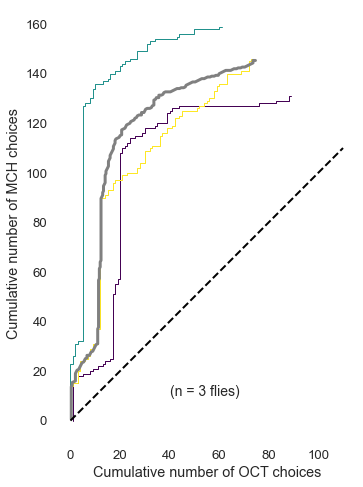

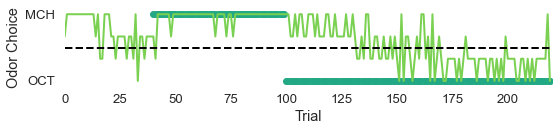

In [143]:
import seaborn as sns
sns.set(style="ticks")
sns.set(font_scale=1.2)
plt.figure(figsize=(7,7))
for n in range(3):
    plt.plot(np.cumsum(histories[n]==0),np.cumsum(histories[n]==1),'-',color=plt.cm.viridis(n/2),alpha=1,linewidth=1)
plt.plot(np.cumsum(histories==0,axis=1).mean(axis=0),np.cumsum(histories==1,axis=1).mean(axis=0),linewidth=3,color='gray',label=f"Average")
plt.plot([0,len(histories[0])//2],[0,len(histories[0])//2],linewidth=2,color='black',linestyle='--')
plt.text(40,10,f"(n = {len(histories)} flies)",fontsize=14)
plt.xlabel('Cumulative number of OCT choices')
plt.ylabel('Cumulative number of MCH choices')
plt.box(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('ReversalLearningTest.png',dpi=300,transparent=True)
plt.show()

i = schedules[0]
plt.figure(figsize=(8,2))
plt.plot(np.arange(i.shape[0])[i[:,0]==1],np.zeros(np.sum(i[:,0]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(np.arange(i.shape[0])[i[:,1]==1],np.ones(np.sum(i[:,1]==1)),'o',color=plt.cm.viridis(0.6),linewidth=2)
plt.plot(histories.mean(axis=0),'-',color=plt.cm.viridis(0.8),linewidth=2)
plt.yticks([0,1],["OCT","MCH"])
plt.xlim([0,i.shape[0]])
plt.axhline(0.5,linewidth=2,color='black',linestyle='--')
plt.box(False)
plt.xlabel('Trial')
plt.ylabel('Odor Choice')
plt.tight_layout()
plt.savefig('ReversalLearningTest-schedules.png',dpi=300,transparent=True)
plt.show()